The following notebook was prepared by Group 3 <br>
Team members are: Chrislyn Durham, Yash Wali, Christoph Sieberer-Kefer, Mayank Manikpuri, Somesh Yadav

In [ ]:
import pandas as pd
df = pd.read_csv('avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Section 1

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [ ]:
# To summarise the dataset we see;

# 14 columns (variables) and 18249 rows (observations)

# There isn't any NULL variable

# data types: float64(9), int64(2), object(3)

# there are some unnamed/undefined columns

# 'region','type' and 'date' columns are in object format

In [ ]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


### Section 2

#### Section 2.1 ###

In [ ]:
#Changing data type
df['region']=df['region'].astype('category')
#df['type']=df['type'].astype('category')
df['Date'] = df['Date'].astype('datetime64[ns]')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    18249 non-null  int64         
 1   Date          18249 non-null  datetime64[ns]
 2   AveragePrice  18249 non-null  float64       
 3   Total Volume  18249 non-null  float64       
 4   4046          18249 non-null  float64       
 5   4225          18249 non-null  float64       
 6   4770          18249 non-null  float64       
 7   Total Bags    18249 non-null  float64       
 8   Small Bags    18249 non-null  float64       
 9   Large Bags    18249 non-null  float64       
 10  XLarge Bags   18249 non-null  float64       
 11  type          18249 non-null  object        
 12  year          18249 non-null  int64         
 13  region        18249 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(9), int64(2), object(1)
memory usage: 1.8+ 

In [ ]:
df.columns = df.columns.str.lower()
num_col = ['averageprice', 'total volume',
                   '4046', '4225', '4770',
                   'total bags', 'small bags',
                   'large bags', 'xlarge bags']
cat_col = ['region', 'type']
date_col = ['date', 'year']

#### Section 2.2 ###

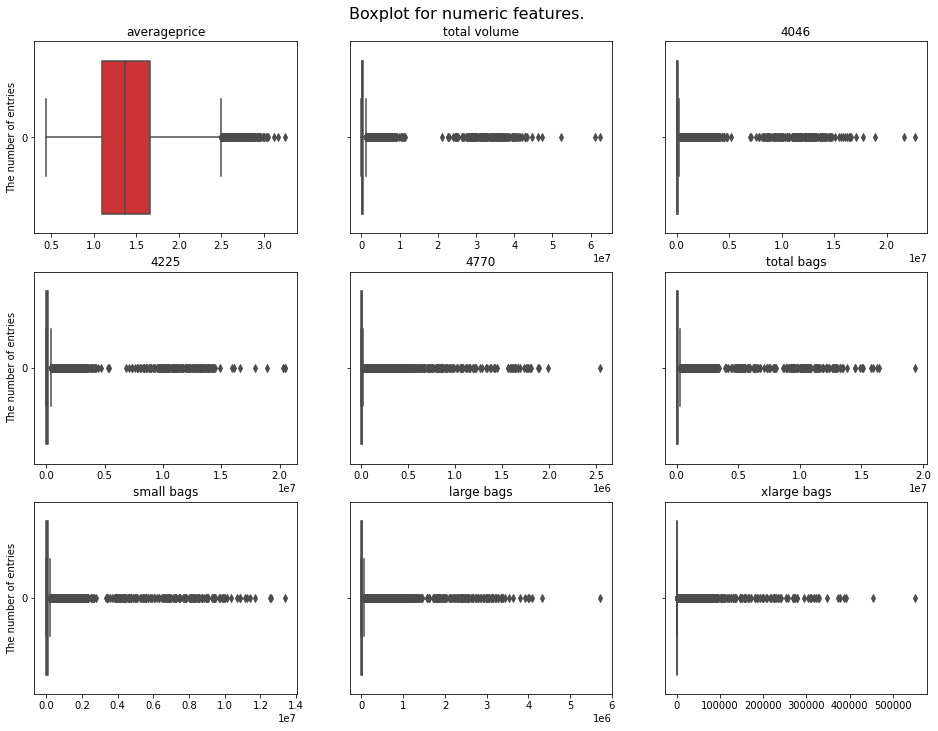

In [ ]:
fig, axs = plt.subplots(3, 3, sharey=True, figsize=(16,12))
fig.suptitle("Boxplot for numeric features.",y=0.92, size=16)
axs = axs.flatten()
for i, data in enumerate(num_col):
    if i % 3 == 0:
        axs[i].set_ylabel('The number of entries')
    sns.boxplot(data=df[data], orient='h', ax=axs[i], palette="Set1")
    axs[i].set_title(data)


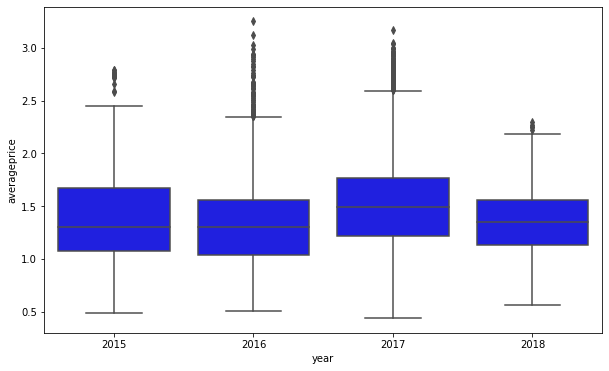

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
sns.boxplot(x='year',y='averageprice',data=df,color='blue')

### Section 3 & 4

In [ ]:
df['type'] = [1 * (i=='conventional') for i in df['type']]

In [ ]:
#Dropping unneeded columns
df.drop('unnamed: 0', axis=1, inplace=True)

In [ ]:
#Checking for null values
df.isna().sum()

date            0
averageprice    0
total volume    0
4046            0
4225            0
4770            0
total bags      0
small bags      0
large bags      0
xlarge bags     0
type            0
year            0
region          0
dtype: int64

In [ ]:
#Checking for duplicates
df.duplicated().sum()

0

### Section 5

1.4059784097758825


Text(0.5, 1.0, 'Skewness is 0.58')

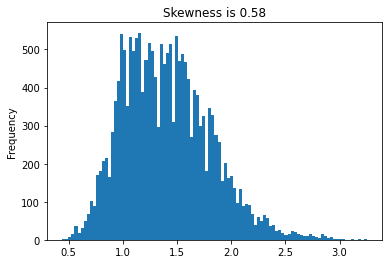

In [ ]:
print(sum(df['averageprice'])/len(df['averageprice']))
df['averageprice'].plot(kind='hist', bins=100)
plt.title('Skewness is '+str(round(df['averageprice'].skew(axis = 0, skipna = True),2)))

 Section 5.1 Some descriptive analysis ##

In [ ]:
#since the data is time series data we want to see a time series plot

df2 = df[['date', 'averageprice']]#make a dataframe with just the time and avgprice
df2 = df2.set_index('date') #setting date as index

weekly_df = df2.resample('W').mean()
finweek_df = weekly_df.reset_index().dropna()

finweek_df.sort_values(by=['date'])




,date,averageprice
0,2015-01-04,1.301296
1,2015-01-11,1.370648
2,2015-01-18,1.391111
3,2015-01-25,1.397130
4,2015-02-01,1.247037
...,...,...
164,2018-02-25,1.359630
165,2018-03-04,1.350185
166,2018-03-11,1.335093
167,2018-03-18,1.313704


In [ ]:
# we can take a look at the data by region

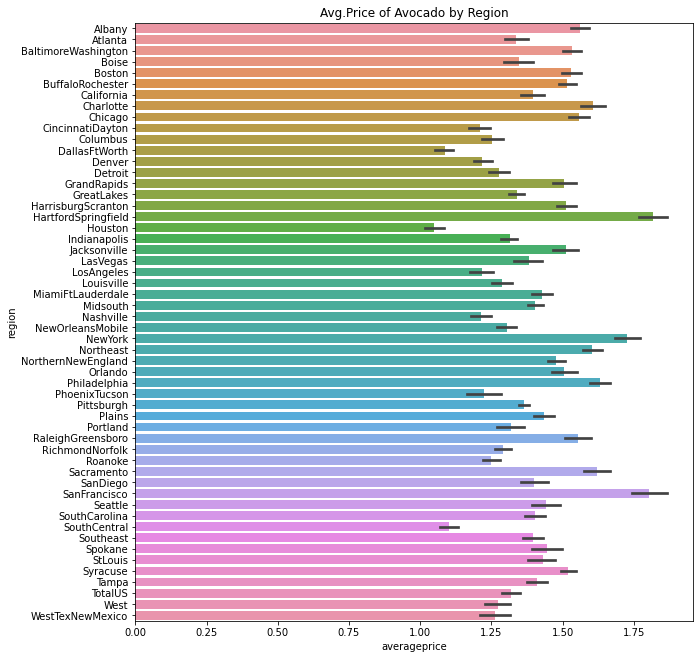

In [ ]:
plt.figure(figsize=(10,11))
plt.title("Avg.Price of Avocado by Region")
#Av= sns.barplot(x="region",y="averageprice",data= df) the x axis is not readable so instead of resizing or using legend we just try with bar plot wit different axis
bplot= sns.barplot(x="averageprice",y="region",data= df)

In [ ]:
exclude = [ 'TotalUS']
df = df[~ df.region.isin(exclude)]
len(df.region.unique())

53

In [ ]:
#We can use time series forecating models since they are out of the scope of our project we will be using logistic and linear regression.

In [ ]:
#we will also use logistic regression to get values to determine feature importance if possible

In [ ]:
#we have a look at the correlation matrix heatmap before going forward with the modelling 

In [ ]:
df[['4046', "4225", "4770",'small bags','large bags','xlarge bags','total volume','total bags']].corr()

,4046,4225,4770,small bags,large bags,xlarge bags,total volume,total bags
4046,1.000000,0.603442,0.509280,0.761604,0.589649,0.436249,0.895002,0.776373
4225,0.603442,1.000000,0.623368,0.782892,0.466107,0.449903,0.872547,0.754345
4770,0.509280,0.623368,1.000000,0.566304,0.343136,0.587963,0.649072,0.553417
small bags,0.761604,0.782892,0.566304,1.000000,0.613817,0.587470,0.920763,0.969591
large bags,0.589649,0.466107,0.343136,0.613817,1.000000,0.267308,0.668446,0.787834
xlarge bags,0.436249,0.449903,0.587963,0.587470,0.267308,1.000000,0.538396,0.555153
total volume,0.895002,0.872547,0.649072,0.920763,0.668446,0.538396,1.000000,0.924980
total bags,0.776373,0.754345,0.553417,0.969591,0.787834,0.555153,0.924980,1.000000


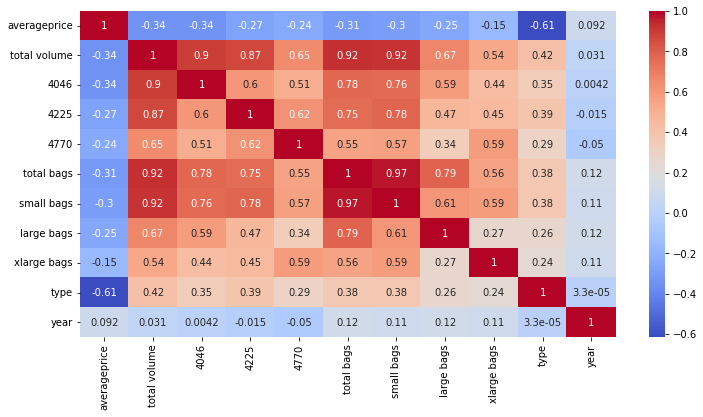

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

In [ ]:
# There is a high correlation between total volume and rest of the variables which is justified as each individual sales directly 
#contribute to the total volumne
#similar is the case with bags variables

###Section 5.2 Some more pre processing ##

In [ ]:
dfn = df.drop(columns = ['year','date','type'],axis = 1)

In [ ]:
dfn.head()


,averageprice,total volume,4046,4225,4770,total bags,small bags,large bags,xlarge bags,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,Albany


In [ ]:
dfn.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 17911 entries, 0 to 18248
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   averageprice  17911 non-null  float64 
 1   total volume  17911 non-null  float64 
 2   4046          17911 non-null  float64 
 3   4225          17911 non-null  float64 
 4   4770          17911 non-null  float64 
 5   total bags    17911 non-null  float64 
 6   small bags    17911 non-null  float64 
 7   large bags    17911 non-null  float64 
 8   xlarge bags   17911 non-null  float64 
 9   region        17911 non-null  category
dtypes: category(1), float64(9)
memory usage: 1.4 MB


In [ ]:
df2 = dfn.copy()

In [ ]:
dfn.drop('region',axis = 1)

,averageprice,total volume,4046,4225,4770,total bags,small bags,large bags,xlarge bags
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0
...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0


In [ ]:
Y = dfn['averageprice']
x = dfn.drop(columns = ['averageprice','region'],axis = 1)

In [ ]:
x.describe()

,total volume,4046,4225,4770,total bags,small bags,large bags,xlarge bags
count,1.791100e+04,1.791100e+04,1.791100e+04,17911.000000,1.791100e+04,1.791100e+04,1.791100e+04,17911.000000
mean,5.392587e+05,1.838074e+05,1.882231e+05,14551.234381,1.526757e+05,1.162029e+05,3.450569e+04,1967.168041
std,1.224332e+06,5.151059e+05,4.519856e+05,48817.536762,3.645992e+05,2.787596e+05,1.139477e+05,8186.402196
min,8.456000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,1.057102e+04,8.196600e+02,2.909610e+03,0.000000,4.905195e+03,2.700335e+03,1.129950e+02,0.000000
50%,1.001541e+05,7.824430e+03,2.670199e+04,164.230000,3.755102e+04,2.453062e+04,2.459220e+03,0.000000
75%,4.001767e+05,1.014888e+05,1.317552e+05,5736.735000,1.036916e+05,7.928259e+04,1.942171e+04,106.760000
max,1.127475e+07,5.160897e+06,5.402444e+06,804558.250000,4.145407e+06,3.403581e+06,2.838239e+06,131300.760000


### Section 6 and 7

In [ ]:
import statsmodels.formula.api as sm

In [ ]:
from sklearn import preprocessing

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
df2['averageprice'] = df2['averageprice'] /df2['averageprice'].abs().max()

In [ ]:
df2['averageprice']

0        0.409231
1        0.415385
2        0.286154
3        0.332308
4        0.393846
           ...   
18244    0.501538
18245    0.526154
18246    0.575385
18247    0.593846
18248    0.498462
Name: averageprice, Length: 17911, dtype: float64

In [ ]:
logit = sm.logit('averageprice ~ region', data = df2).fit(method ='bfgs') 
logit.summary()

NameError: ignored

In [ ]:
count_0 = 0
count_1 = 0

for i in df['type']:
    if i != 0:
        count_1 += 1
    else:
        count_0 += 1

print(count_0, count_1) # predictor variable is evenly distributed


X = np.array(df['type']).reshape(-1, 1)
y = df['averageprice']

train_X, test_X, train_y, test_y = train_test_split(X, y, shuffle=True, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(train_X, train_y)
y_pred = model.predict(test_X)

print('Loss: ', mean_squared_error(y_pred, test_y))

8954 8957
Loss:  0.10066114781881612


### (Section 8)  linear regression on whole dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.2, random_state=0)

In [ ]:
LinReg = LinearRegression()
LinReg.fit(X_train,y_train)

LinearRegression()

In [ ]:
from sklearn import metrics

In [ ]:
print('MAE: ',metrics.mean_absolute_error(y_test, LinReg.predict(X_test)))
print('MSE: ',metrics.mean_squared_error(y_test, LinReg.predict(X_test)))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, LinReg.predict(X_test))))

MAE:  0.29734198939855466
MSE:  0.13860414489003828
RMSE: 0.3722957760840677


#### we notice we have a high root mean square and mean squared errors and the inference is because we havent separated the organic and generic ones.

To get better modelling results our next steps will be to divide the data set to get better results.

In [ ]:
df_conventional = df[df['type'] == 1]
df_organic = df[df['type'] == 0]

**Conventional avocados time graph and average price descriptive**

In [ ]:
dfconplot = df_conventional[['date', 'averageprice']]#make a dataframe with just the time and avgprice
dfconplot = dfconplot.set_index('date') #setting date as index

weekly_df = dfconplot.resample('W').mean()
finweek_df = weekly_df.reset_index().dropna()

finweek_df.sort_values(by=['date'])

,date,averageprice
0,2015-01-04,1.010755
1,2015-01-11,1.113208
2,2015-01-18,1.135472
3,2015-01-25,1.116792
4,2015-02-01,0.963396
...,...,...
164,2018-02-25,1.142642
165,2018-03-04,1.143774
166,2018-03-11,1.137547
167,2018-03-18,1.097170


No handles with labels found to put in legend.


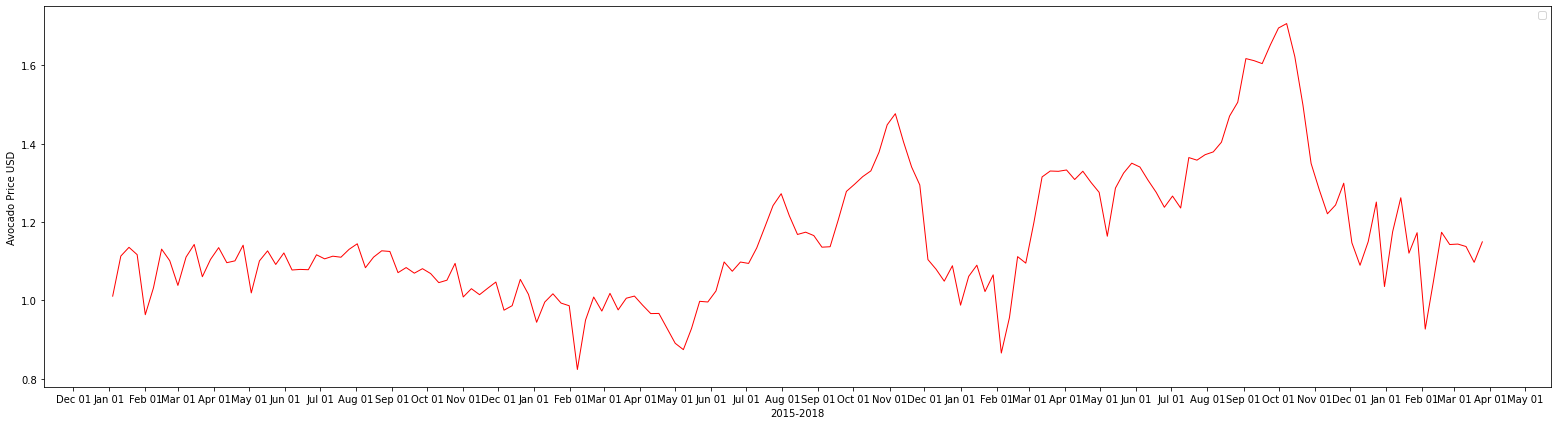

In [ ]:
import matplotlib.dates as mdates


fig = plt.figure(figsize = (27, 7))
ax = plt.axes()
#set ticks every month
ax.xaxis.set_major_locator(mdates.MonthLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.plot(finweek_df['date'],finweek_df['averageprice'],color='r', linewidth=1)
plt.xlabel("2015-2018")
plt.ylabel("Avocado Price USD")
plt.legend()
plt.show()

 **Organic avocados descriptives **

In [ ]:
df_organic.head()

,date,averageprice,total volume,4046,4225,4770,total bags,small bags,large bags,xlarge bags,type,year,region
9126,2015-12-27,1.83,989.55,8.16,88.59,0.0,892.80,892.80,0.00,0.0,0,2015,Albany
9127,2015-12-20,1.89,1163.03,30.24,172.14,0.0,960.65,960.65,0.00,0.0,0,2015,Albany
9128,2015-12-13,1.85,995.96,10.44,178.70,0.0,806.82,806.82,0.00,0.0,0,2015,Albany
9129,2015-12-06,1.84,1158.42,90.29,104.18,0.0,963.95,948.52,15.43,0.0,0,2015,Albany
9130,2015-11-29,1.94,831.69,0.00,94.73,0.0,736.96,736.96,0.00,0.0,0,2015,Albany


In [ ]:
dforgplot = df_organic[['date', 'averageprice']]#make a dataframe with just the time and avgprice
dforgplot = dforgplot.set_index('date') #setting date as index

weekly_df = dforgplot.resample('W').mean()
finweek_df = weekly_df.reset_index().dropna()

finweek_df.sort_values(by=['date'])

,date,averageprice
0,2015-01-04,1.595472
1,2015-01-11,1.633962
2,2015-01-18,1.653019
3,2015-01-25,1.681698
4,2015-02-01,1.535283
...,...,...
164,2018-02-25,1.578302
165,2018-03-04,1.558679
166,2018-03-11,1.533774
167,2018-03-18,1.530943


No handles with labels found to put in legend.


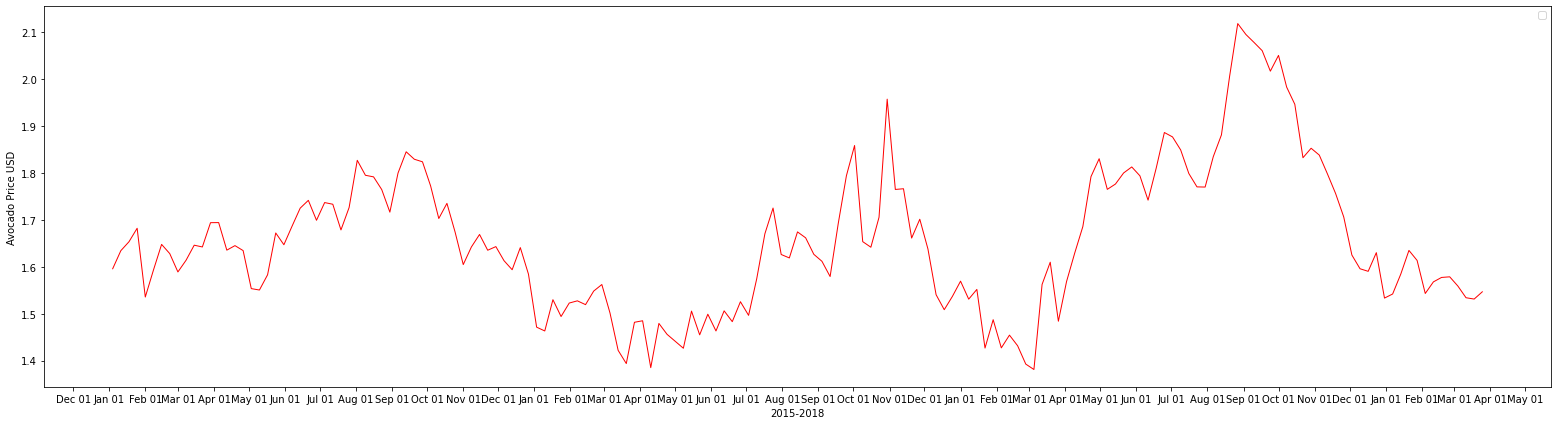

In [ ]:
import matplotlib.dates as mdates


fig = plt.figure(figsize = (27, 7))
ax = plt.axes()
#set ticks every month
ax.xaxis.set_major_locator(mdates.MonthLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.plot(finweek_df['date'],finweek_df['averageprice'],color='r', linewidth=1)
plt.xlabel("2015-2018")
plt.ylabel("Avocado Price USD")
plt.legend()
plt.show()

### (Section 9) Modelling for regression for conventional and organic

In [ ]:
df_conventional = df_conventional.drop(columns = ['year','date','type','region'],axis = 1)
df_organic = df_organic.drop(columns = ['year','date','type','region'],axis = 1)

In [ ]:
Y = df_conventional['averageprice']
x = df_conventional.drop(columns = ['averageprice'],axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression

LinReg = LinearRegression()
LinReg.fit(X_train,y_train)

LinearRegression()

In [ ]:
print('MAE_conventional: ',metrics.mean_absolute_error(y_test, LinReg.predict(X_test)))
print('MSE_conventional: ',metrics.mean_squared_error(y_test, LinReg.predict(X_test)))
print('RMSE_conventional:',np.sqrt(metrics.mean_squared_error(y_test, LinReg.predict(X_test))))

MAE_conventional:  0.2000171831859078
MSE_conventional:  0.0632588581375095
RMSE_conventional: 0.2515131371072086


our accuracy seems to have improved as expected.
The accuracy improved because of the difference in price between organic and conventional which was introducing imbalance in data and even from a fundamental point of view i did not make sense as Organic and Conventional will always have a price difference.

In [ ]:
Y = df_organic['averageprice']
x = df_organic.drop(columns = ['averageprice'],axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression

LinReg = LinearRegression()
LinReg.fit(X_train,y_train)

LinearRegression()

In [ ]:
print('MAE_organic: ',metrics.mean_absolute_error(y_test, LinReg.predict(X_test)))
print('MSE_organic: ',metrics.mean_squared_error(y_test, LinReg.predict(X_test)))
print('RMSE_organic:',np.sqrt(metrics.mean_squared_error(y_test, LinReg.predict(X_test))))

MAE_organic:  0.2827751579198437
MSE_organic:  0.13364199761787968
RMSE_organic: 0.3655707833209318


We did not see Significant increase in modelling prediction for Organic avocados. Which means the price variability of these avocados is pretty high.

### (Section 10) **Now we Remove region Discrepancy,Further analysis and move towards sophistical modelling **

In [ ]:
exclude = ['California', 'GreatLakes', 'Midsouth', 'NewYork', 'Northeast', 'SouthCarolina', 'Plains', 'SouthCentral', 'Southeast', 'TotalUS', 'West']
newdf = df[~ df.region.isin(exclude)]
len(newdf.region.unique())

43

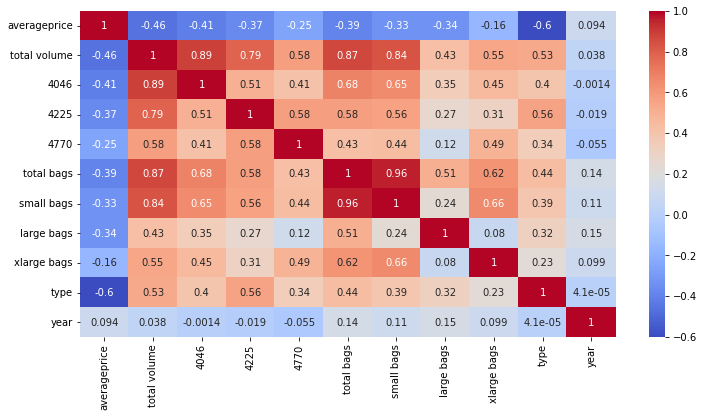

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(newdf.corr(),cmap='coolwarm',annot=True)

We can see the difference in te new co-relation matrix.

In [ ]:
newdf_conventional = newdf[newdf['type'] == 1]
newdf_organic = newdf[newdf['type'] == 0]

In [ ]:
newdf_organic.head(-20)

,date,averageprice,total volume,4046,4225,4770,total bags,small bags,large bags,xlarge bags,type,year,region
9126,2015-12-27,1.83,989.55,8.16,88.59,0.0,892.80,892.80,0.00,0.0,0,2015,Albany
9127,2015-12-20,1.89,1163.03,30.24,172.14,0.0,960.65,960.65,0.00,0.0,0,2015,Albany
9128,2015-12-13,1.85,995.96,10.44,178.70,0.0,806.82,806.82,0.00,0.0,0,2015,Albany
9129,2015-12-06,1.84,1158.42,90.29,104.18,0.0,963.95,948.52,15.43,0.0,0,2015,Albany
9130,2015-11-29,1.94,831.69,0.00,94.73,0.0,736.96,736.96,0.00,0.0,0,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18200,2018-01-07,1.25,4764.47,59.95,133.89,0.0,4570.63,3125.05,1445.58,0.0,0,2018,Syracuse
18201,2018-03-25,1.41,10028.49,138.15,773.22,0.0,9117.12,8208.82,908.30,0.0,0,2018,Tampa
18202,2018-03-18,1.50,10311.24,190.28,901.77,0.0,9219.19,7687.03,1532.16,0.0,0,2018,Tampa
18203,2018-03-11,1.31,8115.07,101.14,392.38,0.0,7621.55,7494.08,127.47,0.0,0,2018,Tampa


We see organic dataframe has almost no sales of large bags in 2015 which gradually increased over the time period and xl bags. There is also no 4770 type of avocados either.

we can use regression model to predict the average no. of sales for large bags and small bags to help in packaging.

In [ ]:
dfconplot = newdf_organic[['date', 'small bags','large bags']]#make a dataframe with just the time and large bags
dfconplot = dfconplot.set_index('date') #setting date as index

weekly_df = dfconplot.resample('W').mean()
finweek_df = weekly_df.reset_index().dropna()

finweek_df.sort_values(by=['date'])

,date,small bags,large bags
0,2015-01-04,1240.827674,600.619302
1,2015-01-11,1230.350000,361.532093
2,2015-01-18,1148.683953,601.932093
3,2015-01-25,1091.082558,513.952558
4,2015-02-01,1452.671628,636.657442
...,...,...,...
164,2018-02-25,10102.451628,3467.489767
165,2018-03-04,11298.625814,4097.806279
166,2018-03-11,12805.506512,2390.733721
167,2018-03-18,11015.095349,3144.866744


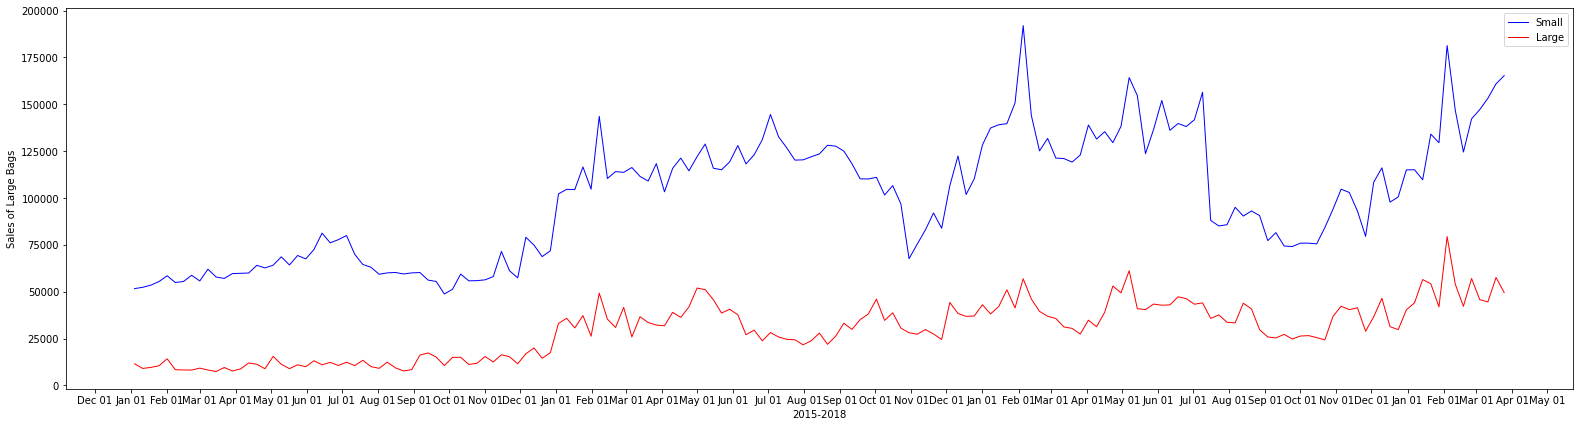

In [ ]:
import matplotlib.dates as mdates


fig = plt.figure(figsize = (27, 7))
ax = plt.axes()
#set ticks every month
ax.xaxis.set_major_locator(mdates.MonthLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.plot(finweek_df['date'],finweek_df['small bags'],color='b', linewidth=1)
plt.plot(finweek_df['date'],finweek_df['large bags'],color='r', linewidth=1)
plt.xlabel("2015-2018")
plt.ylabel("Sales of Small and Large Bags")
plt.legend(['Small','Large'])
plt.show()

we see the sales of small bags of organic has way more significant growth than large bags which peaked and reduced with time

This shows a consumer shift from large bags to small abgs and if manufacturers can design products around small bags to attract customers.

In [ ]:
newdf_conventional.head(-20)

,date,averageprice,total volume,4046,4225,4770,total bags,small bags,large bags,xlarge bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,1,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,1,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,1,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,1,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,1,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9077,2018-01-07,1.21,68938.02,3687.73,46420.20,60.09,18770.00,5075.27,13694.73,0.00,1,2018,Syracuse
9078,2018-03-25,1.33,469300.74,289527.11,33226.48,1342.31,145204.84,87355.05,57643.12,206.67,1,2018,Tampa
9079,2018-03-18,1.13,574380.46,372785.73,43017.73,1301.33,157275.67,93201.11,63924.56,150.00,1,2018,Tampa
9080,2018-03-11,1.16,580771.43,372746.58,45277.75,1442.66,161304.44,92677.26,68493.85,133.33,1,2018,Tampa


In [ ]:
dfconplot = newdf_conventional[['date', 'large bags','small bags','total bags']]#make a dataframe with just the time and large bags
dfconplot = dfconplot.set_index('date') #setting date as index

weekly_df = dfconplot.resample('W').mean()
finweek_df = weekly_df.reset_index().dropna()

finweek_df.sort_values(by=['date'])

,date,large bags,small bags,total bags
0,2015-01-04,11526.314419,51641.759302,63475.305581
1,2015-01-11,9058.463953,52335.767674,61666.283721
2,2015-01-18,9593.934651,53482.756512,63203.988372
3,2015-01-25,10489.702093,55411.003023,66046.088605
4,2015-02-01,14179.608605,58485.104884,73406.695349
...,...,...,...,...
164,2018-02-25,57035.325581,142230.716047,203349.584884
165,2018-03-04,45758.871860,147145.838605,196501.007442
166,2018-03-11,44554.650000,153200.563721,201389.578605
167,2018-03-18,57583.428372,160909.215814,222186.984884


No handles with labels found to put in legend.


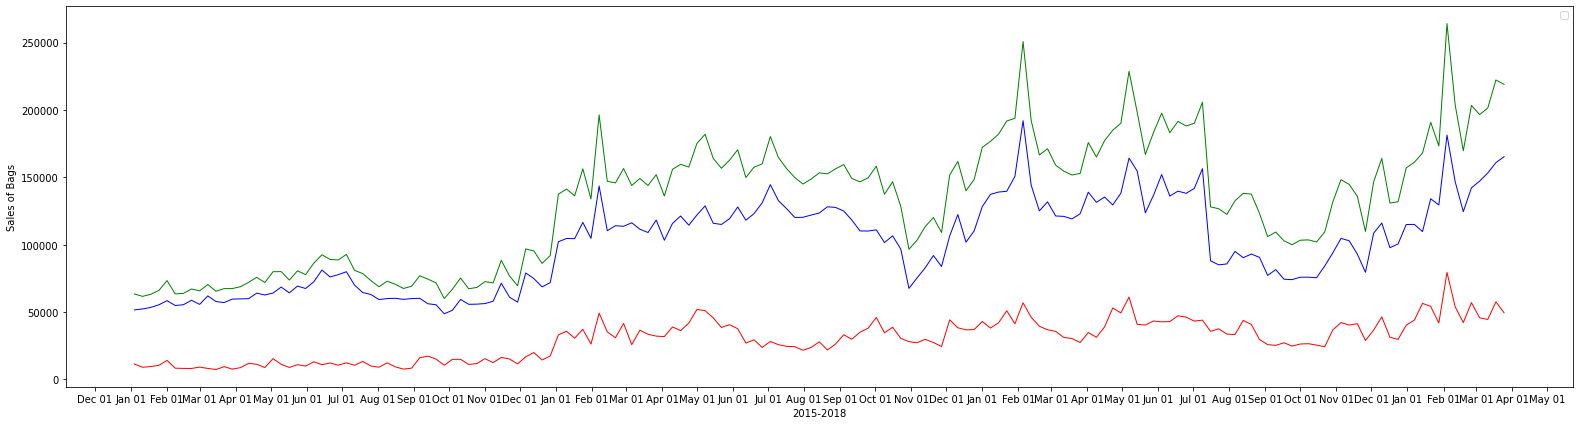

In [ ]:
import matplotlib.dates as mdates


fig = plt.figure(figsize = (27, 7))
ax = plt.axes()
#set ticks every month
ax.xaxis.set_major_locator(mdates.MonthLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.plot(finweek_df['date'],finweek_df['large bags'],color='r', linewidth=1)
plt.plot(finweek_df['date'],finweek_df['small bags'],color='b', linewidth=1)
plt.plot(finweek_df['date'],finweek_df['total bags'],color='g', linewidth=1)
plt.xlabel("2015-2018")
plt.ylabel("Sales of Bags")
plt.legend('Large','Small',"Total")
plt.show()

Conventional has a different trend than organic which shows the sales of large bags increase constantly.

the sale trend in number of small bags is undecisive though it seems to be increasing in small time frame we don't know about the sustainability based on historical events.


we try to find correlation between sales of small bags large bags and total bags

In [ ]:
corrdfcon = newdf_conventional[['small bags','large bags','total bags',]]
corrdforg = newdf_organic[['small bags','large bags','total bags',]]

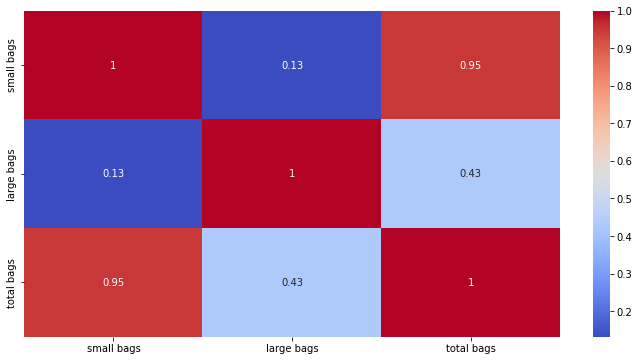

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(corrdfcon.corr(),cmap='coolwarm',annot=True)

we see high correaltion between small bags, and total bags sales for conventional type


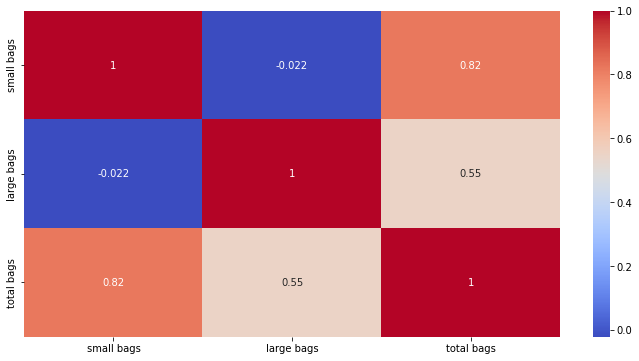

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(corrdforg.corr(),cmap='coolwarm',annot=True)

In Case of organic type too we see high correaltion between small bags and total bag sales

We can also do a type to total sales correlation plot.

In [ ]:
corrdfcont = newdf_conventional[['4046','4225','4770','total bags',]]
corrdforgt = newdf_organic[['4046','4225','4770','total bags',]]

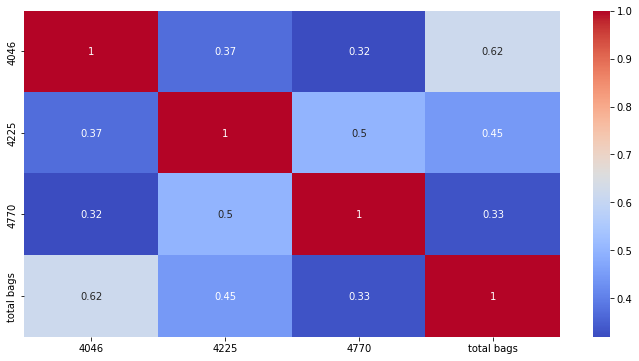

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(corrdfcont.corr(),cmap='coolwarm',annot=True)

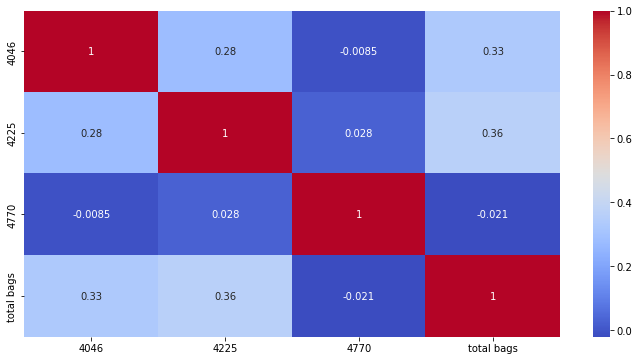

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(corrdforgt.corr(),cmap='coolwarm',annot=True)

we clearly see correlation in conventional sales between type 4046 and total bags but for organic sales the type is undecisive.This when combined with time series graph can give us good insight.

### (Section 11) Conventional Data Set and prediction modelling Using random forrest regressor,XGboost regressor

In [ ]:
X = newdf_conventional.drop(['averageprice','date'], axis = 1).copy()
y = newdf_conventional['averageprice'].copy()

In [ ]:
X.head()

,total volume,4046,4225,4770,total bags,small bags,large bags,xlarge bags,type,year,region
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,1,2015,Albany
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,1,2015,Albany
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,1,2015,Albany
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,1,2015,Albany
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,1,2015,Albany


#### (11.1) Instead of deleting We replace the categorical variables with dummy variables to kind of add a weight when modelling

In [ ]:
X = pd.get_dummies(data = X, columns = ["type", "region", "year"], prefix = ["type", "region", "year"], drop_first = True)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
# Scaling tha data 
ss = StandardScaler()
X = ss.fit_transform(X)

#### (11.2) we now define a function which will help us get the scores.

In [ ]:
model_scores = {"train" : [],
                "test" : [],
                "mae" : [],
                "mse" : [],
                "rmse" : []}

def results(model):
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    model_scores["train"].append(train_score)
    pred = model.predict(X_test)
    test_score = model.score(X_test, y_test)
    model_scores["test"].append(test_score)
    mae = mean_absolute_error(pred, y_test)
    model_scores["mae"].append(mae)
    mse = mean_squared_error(pred, y_test)
    model_scores["mse"].append(mse)
    rmse = np.sqrt(mse)
    model_scores["rmse"].append(rmse)
    print("train score: {0:.4f}\nR2 score: {1:.4f}\nMAE: {2:.4f}\nMSE: {3:.4f}\nRMSE: {4:.4f}".format(train_score, test_score, mae, mse, rmse))

##### (11.3) Splitting and modelling Linear regression

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, shuffle = True)

In [ ]:
lr = LinearRegression()
print("Linear Regression\n")
results(lr)

Linear Regression

train score: 0.6508
R2 score: 0.6594
MAE: 0.1194
MSE: 0.0256
RMSE: 0.1599


We see better regression results when we scaled and balance the data and used the dummy variables which we did in logistic regression to fine tune our regression modelling

#### (11.4) Regressors for Conventional

In [ ]:
#now we try different ensemble modelling techniques which are rrandom forest regressor and xgboost regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor


In [ ]:
randomforest = RandomForestRegressor(random_state = 0)
print("Random Forest\n")
results(randomforest)

Random Forest

train score: 0.9736
R2 score: 0.8189
MAE: 0.0850
MSE: 0.0136
RMSE: 0.1166


Random forrest regressor is an ensemble technique included in report

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgb = XGBRegressor(random_state = 8)
print("XGBoost\n")
results(xgb)

XGBoost

[01:47:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
train score: 0.6801
R2 score: 0.6458
MAE: 0.1238
MSE: 0.0266
RMSE: 0.1631


we got better results using xgboost and random regressor but we lose interpretability 

#### (11.5) Regressor Organic data set ####

In [ ]:
#redefine new df and conventional and organic to remove discrepancy if any caused by above cell
exclude = ['California', 'GreatLakes', 'Midsouth', 'NewYork', 'Northeast', 'SouthCarolina', 'Plains', 'SouthCentral', 'Southeast', 'TotalUS', 'West']
newdf = df[~ df.region.isin(exclude)]
len(newdf.region.unique())

newdf_conventional = newdf[newdf['type'] == 1]
newdf_organic = newdf[newdf['type'] == 0]

In [ ]:
newdf_organic.head(20)

,date,averageprice,total volume,4046,4225,4770,total bags,small bags,large bags,xlarge bags,type,year,region
9126,2015-12-27,1.83,989.55,8.16,88.59,0.0,892.80,892.80,0.00,0.0,0,2015,Albany
9127,2015-12-20,1.89,1163.03,30.24,172.14,0.0,960.65,960.65,0.00,0.0,0,2015,Albany
9128,2015-12-13,1.85,995.96,10.44,178.70,0.0,806.82,806.82,0.00,0.0,0,2015,Albany
9129,2015-12-06,1.84,1158.42,90.29,104.18,0.0,963.95,948.52,15.43,0.0,0,2015,Albany
9130,2015-11-29,1.94,831.69,0.00,94.73,0.0,736.96,736.96,0.00,0.0,0,2015,Albany
9131,2015-11-22,1.94,858.83,13.84,84.18,0.0,760.81,755.69,5.12,0.0,0,2015,Albany
9132,2015-11-15,1.89,1208.54,20.71,238.16,0.0,949.67,949.67,0.00,0.0,0,2015,Albany
9133,2015-11-08,1.88,1332.27,20.08,351.40,0.0,960.79,960.79,0.00,0.0,0,2015,Albany
9134,2015-11-01,1.88,1021.68,11.47,137.58,0.0,872.63,872.63,0.00,0.0,0,2015,Albany
9135,2015-10-25,1.83,1161.90,49.27,148.96,0.0,963.67,963.67,0.00,0.0,0,2015,Albany


##### Splitting and Scaling for modelling

In [ ]:
X = newdf_organic.drop(['averageprice','date'], axis = 1).copy()
y = newdf_organic['averageprice'].copy()


In [ ]:
X = pd.get_dummies(data = X, columns = ["type", "region", "year"], prefix = ["type", "region", "year"], drop_first = True)

In [ ]:
# Scaling tha data
ss = StandardScaler()
X = ss.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, shuffle = True)

##### Linear Regression

In [ ]:
lr = LinearRegression()
print("Linear Regression\n")
results(lr)

Linear Regression

train score: 0.4758
R2 score: 0.4705
MAE: 0.2087
MSE: 0.0804
RMSE: 0.2835


##### Other regressors

In [ ]:
randomforest = RandomForestRegressor(random_state = 0)
print("Random Forest\n")
results(randomforest)

Random Forest

train score: 0.9638
R2 score: 0.7527
MAE: 0.1423
MSE: 0.0375
RMSE: 0.1938


In [ ]:
xgb = XGBRegressor(random_state = 8)
print("XGBoost\n")
results(xgb)

XGBoost

[01:47:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
train score: 0.6136
R2 score: 0.5647
MAE: 0.1940
MSE: 0.0661
RMSE: 0.2571


### (Section 12) ARIMA (on avocado type conventional)

Source for following analysis: https://towardsdatascience.com/machine-learning-part-19-time-series-and-autoregressive-integrated-moving-average-model-arima-c1005347b0d7

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

from pandas.plotting import autocorrelation_plot

import warnings
warnings.filterwarnings('ignore')

import matplotlib.dates as mpl_dates

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('avocado.csv')

FileNotFoundError: ignored

In [ ]:
df_arima = df.copy()

In [ ]:
df_arima.columns = df_arima.columns.str.lower()
df_arima['type'] = [1 * (i=='conventional') for i in df_arima['type']]

,unnamed: 0,date,averageprice,total volume,4046,4225,4770,total bags,small bags,large bags,xlarge bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,1,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,1,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,1,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,1,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,1,2015,Albany


In [ ]:
df_arima = df_arima[(df_arima['region']=='TotalUS') & (df_arima['type']==1)]
df_arima.head()

,unnamed: 0,date,averageprice,total volume,4046,4225,4770,total bags,small bags,large bags,xlarge bags,type,year,region
2652,0,2015-12-27,0.95,27297983.67,9626901.09,10197890.05,1184340.09,6288852.44,4850404.09,1252626.31,185822.04,1,2015,TotalUS
2653,1,2015-12-20,0.98,25083647.17,8710021.76,9329861.85,1201020.01,5842743.55,4618389.66,1025048.77,199305.12,1,2015,TotalUS
2654,2,2015-12-13,0.93,28041335.38,9855053.66,10805838.91,1016163.17,6364279.64,4964462.13,1371440.28,28377.23,1,2015,TotalUS
2655,3,2015-12-06,0.89,28800396.57,9405464.36,12160838.62,931830.63,6302262.96,5005077.36,1233956.21,63229.39,1,2015,TotalUS
2656,4,2015-11-29,0.99,22617999.38,8094803.56,9003178.41,731008.41,4789009.00,3901953.04,856560.34,30495.62,1,2015,TotalUS


In [ ]:
df_arima['date'] = pd.to_datetime(df_arima.date)

In [ ]:
df_arima.sort_values(by='date', inplace=True)

In [ ]:
df_arima_b = pd.DataFrame()
df_arima_b['date_ym'] = df_arima['date'].apply(lambda x: x.strftime('%Y-%m'))

In [ ]:
df_arima = df_arima.loc[:,['date', 'averageprice']]
df_arima.set_index('date', inplace=True)

In [ ]:
df_arima.head()

,averageprice
date,
2015-01-04,0.95
2015-01-11,1.01
2015-01-18,1.03
2015-01-25,1.04
2015-02-01,0.89


- The first thing before applying an ARIMA model is to check if the time series data is stationary
- Three characteristics that define a stationary time series:
    - The expected value should not change over time
    - Secondly, the variance of the series should not be a function of time
    - Thirdly, the covariance of the ith term and the (i + n)th term should not be a function of time

**Two ways to determine whether a time series is stationary:**
- Rolling mean & standard deviation:
    - Both the rolling mean and standard deviation should be constant with time
- ADF test (Augmented Dickey-Fuller test):
    - Low p-value and critical values close to the test statistic point to a stationary time series

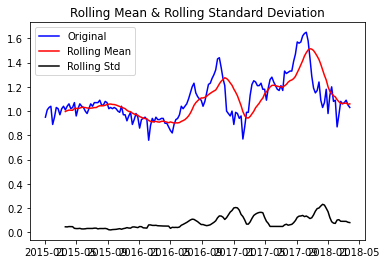

In [ ]:
rolling_mean = df_arima.rolling(window = 24).mean()
rolling_std = df_arima.rolling(window = 24).std()
plt.figure(figsize=(10,7))
plt.plot(df_arima, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

As seen per the line chart above, the rolling average and standard deviation are close to being constant. Therefore, in a first step, we just went ahead and used the time series as given. 

#### (12.1) The following calculates the ADF test statistic and p-value of the ADF test

In [ ]:
result = adfuller(df_arima['averageprice'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))

ADF Statistic: -2.573341359997121
p-value: 0.09863318474462979
Critical Values:
	1%: -3.4698858990744115
	5%: -2.8789026251889647
	10%: -2.5760266680839004


With an alpha = 0.1, the p-value is below the threshold which leads us to believe that we have enough evidence to reject the null hypothesis (H0: time series is not stationary) and accept the alternative hypothesis (H1: time series is stationary)

In [ ]:
df_arima_b['date_ym'] = pd.to_datetime(df_arima_b['date_ym'])

In [ ]:
df_arima_b['date_ym'] = df_arima_b['date_ym'][pd.DatetimeIndex(df_arima_b['date_ym']).year == 2017]

In [ ]:
df_arima_c = pd.DataFrame()
df_arima_c['date_ym'] = df_arima_b['date_ym'].unique()
df_arima_c = df_arima_c.iloc[1:]
df_arima_c.reset_index(drop=True, inplace=True)

In [ ]:
len(df_arima_c) # corresponds to 1 year (2017)

12

In [ ]:
df_arima_c['date_ym'] = df_arima_c['date_ym'].apply(mpl_dates.date2num)
df_arima_c = df_arima_c.astype(float)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

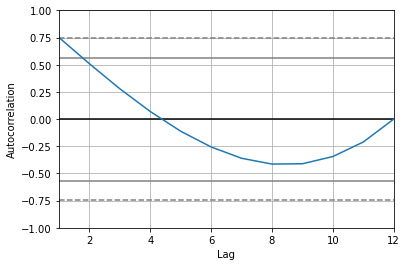

In [ ]:
autocorrelation_plot(df_arima_c)

The ACF for 2017 shows that the first 4 months are correlated with each other (in other words, MA will be of order 4) 

In [ ]:
pacf(df_arima_c, nlags=4)

array([ 1.        ,  0.81915871, -0.18235072, -0.22184891, -0.26082379])

The PACF (Partial Autocorrelation Function) result shows that the first two months are correlated with each other (in other words, the AR will be of order 2)

The ARIMA model takes in 3 arguments:
- p: number of autogregressive terms (determined by PACF)
- d: number of nonseasonal differences
- q: number of moving average terms (determined by ACF)

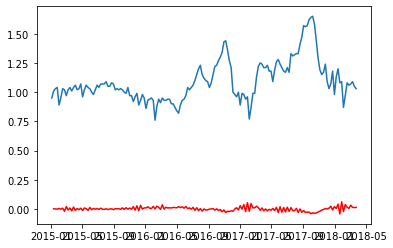

In [ ]:
decomposition = seasonal_decompose(df_arima) 
model = ARIMA(df_arima, order=(2,1,4))
results = model.fit(disp=-1)
plt.figure(figsize=(10,7))
plt.plot(df_arima)
plt.plot(results.fittedvalues, color='red')

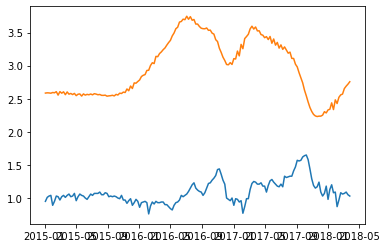

In [ ]:
predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA = pd.Series(df_arima['averageprice'].iloc[0], index=df_arima.index)
predictions_ARIMA = predictions_ARIMA.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_ = np.exp(predictions_ARIMA)
plt.figure(figsize=(10,7))
plt.plot(df_arima)
plt.plot(predictions_ARIMA_)

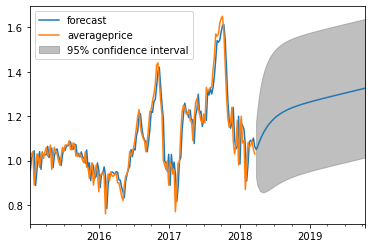

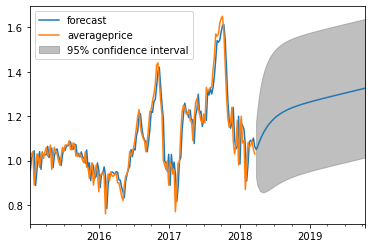

In [ ]:
results.plot_predict(1,250)

As seen per the charts above, the 95% CI on the trend development of the average price of type 'conventional' avocados in the US fans out to extremes. Although a general upward trend can be expected, the noise is too much to accurately predict the average price for the coming years. 

The following experiments with a better implementation of an ARIMA model called Prophet:

### (Section 13) FB Prophet for price prediction

#### (13.1) read dataset again and start fresh for this part of modelling

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline
from fbprophet import Prophet
df = pd.read_csv('avocado.csv')

#### (13.2) Dropping unneeded columns and other renaming others.Changing types of columns.

In [ ]:
#Dropping unneeded columns and other renaming others.
df.drop('Unnamed: 0', axis=1, inplace=True)
df.columns = df.columns.str.lower()

df['date'] = df['date'].astype('datetime64[ns]')
df.head()

,date,averageprice,total volume,4046,4225,4770,total bags,small bags,large bags,xlarge bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


#### (13.4) Conventional avocado price Prediction

In [ ]:
#Doing the analysis for conventional avacados first.
pred_type = 'conventional'
df_conv = df[df.type == pred_type]
df_conv.head()

,date,averageprice,total volume,4046,4225,4770,total bags,small bags,large bags,xlarge bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
#Checking entries per region.
regions = df_conv.groupby(df_conv.region)
print("Total regions :", len(regions))
print("-------------")
for name, group in regions:
    print(name, " : ", len(group))

Total regions : 54
-------------
Albany  :  169
Atlanta  :  169
BaltimoreWashington  :  169
Boise  :  169
Boston  :  169
BuffaloRochester  :  169
California  :  169
Charlotte  :  169
Chicago  :  169
CincinnatiDayton  :  169
Columbus  :  169
DallasFtWorth  :  169
Denver  :  169
Detroit  :  169
GrandRapids  :  169
GreatLakes  :  169
HarrisburgScranton  :  169
HartfordSpringfield  :  169
Houston  :  169
Indianapolis  :  169
Jacksonville  :  169
LasVegas  :  169
LosAngeles  :  169
Louisville  :  169
MiamiFtLauderdale  :  169
Midsouth  :  169
Nashville  :  169
NewOrleansMobile  :  169
NewYork  :  169
Northeast  :  169
NorthernNewEngland  :  169
Orlando  :  169
Philadelphia  :  169
PhoenixTucson  :  169
Pittsburgh  :  169
Plains  :  169
Portland  :  169
RaleighGreensboro  :  169
RichmondNorfolk  :  169
Roanoke  :  169
Sacramento  :  169
SanDiego  :  169
SanFrancisco  :  169
Seattle  :  169
SouthCarolina  :  169
SouthCentral  :  169
Southeast  :  169
Spokane  :  169
StLouis  :  169
Syracuse  

In [ ]:
#Predictions for:
pred_for='TotalUS'

In [ ]:
date_price = regions.get_group(pred_for)[['date', 'averageprice']].reset_index(drop=True)

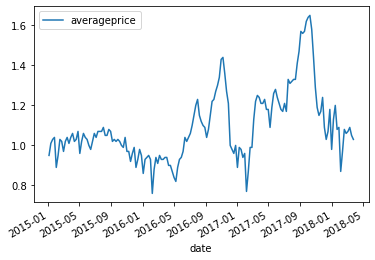

In [ ]:
date_price.plot(x='date', y='averageprice', kind="line")

In [ ]:
#Used fbprophet as:
#Accurate and fast. Prophet is used in many applications across Facebook for producing reliable forecasts for planning and goal setting.
#We've found it to perform better than any other approach in the majority of cases.(from: facebook.github.io)

In [ ]:
#Used this website for reference: https://facebook.github.io/prophet/docs/quick_start.html
#To use fbprophet, we need to rename the column names as:
date_price = date_price.rename(columns={'date':'ds', 'averageprice':'y'})

In [ ]:
#Create the model
model = Prophet()

In [ ]:
#Fit the model
model.fit(date_price)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
#Predictions:
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

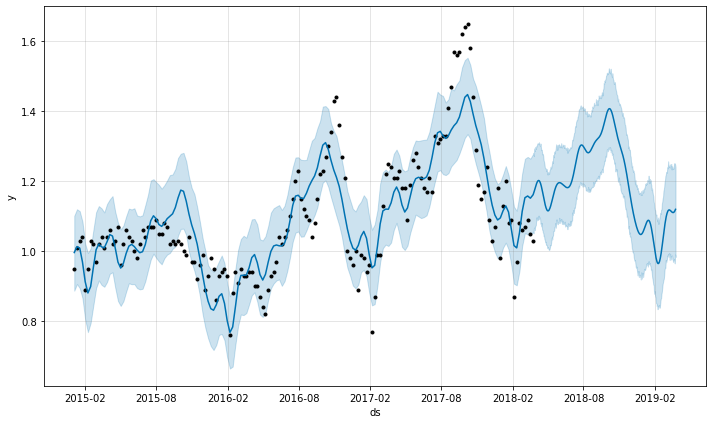

In [ ]:
#Plot the predictions:
figure = model.plot(forecast)

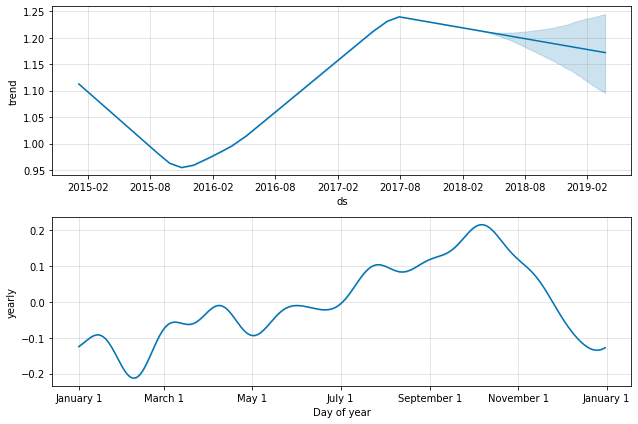

In [ ]:
#We can use fbprophet to check how different components affect the predictions:
figure2 = model.plot_components(forecast)
#Figure 1 shows the trend of the price year on year. The second year shows the seasonality of the prices.

In [ ]:
#Use plotly for interactive forecast.
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, forecast)

In [ ]:
#Similarly, an interactive plot for the components:
plot_components_plotly(model, forecast)
#Figure 1 shows the trend of the price year on year. The second year shows the seasonality of the prices.

The Prices for Conventional Hass seem pretty stable.

#### (13.5) Predictions for Price of Organic Avacados.

In [ ]:
#Predictions for organic.
pred_type = 'organic'
df_org = df[df.type == pred_type]
df_org.head()

,date,averageprice,total volume,4046,4225,4770,total bags,small bags,large bags,xlarge bags,type,year,region
9126,2015-12-27,1.83,989.55,8.16,88.59,0.0,892.80,892.80,0.00,0.0,organic,2015,Albany
9127,2015-12-20,1.89,1163.03,30.24,172.14,0.0,960.65,960.65,0.00,0.0,organic,2015,Albany
9128,2015-12-13,1.85,995.96,10.44,178.70,0.0,806.82,806.82,0.00,0.0,organic,2015,Albany
9129,2015-12-06,1.84,1158.42,90.29,104.18,0.0,963.95,948.52,15.43,0.0,organic,2015,Albany
9130,2015-11-29,1.94,831.69,0.00,94.73,0.0,736.96,736.96,0.00,0.0,organic,2015,Albany


In [ ]:
#Checking entries per region.
regions = df_org.groupby(df_org.region)
print("Total regions :", len(regions))
print("-------------")
for name, group in regions:
    print(name, " : ", len(group))

Total regions : 54
-------------
Albany  :  169
Atlanta  :  169
BaltimoreWashington  :  169
Boise  :  169
Boston  :  169
BuffaloRochester  :  169
California  :  169
Charlotte  :  169
Chicago  :  169
CincinnatiDayton  :  169
Columbus  :  169
DallasFtWorth  :  169
Denver  :  169
Detroit  :  169
GrandRapids  :  169
GreatLakes  :  169
HarrisburgScranton  :  169
HartfordSpringfield  :  169
Houston  :  169
Indianapolis  :  169
Jacksonville  :  169
LasVegas  :  169
LosAngeles  :  169
Louisville  :  169
MiamiFtLauderdale  :  169
Midsouth  :  169
Nashville  :  169
NewOrleansMobile  :  169
NewYork  :  169
Northeast  :  169
NorthernNewEngland  :  169
Orlando  :  169
Philadelphia  :  169
PhoenixTucson  :  169
Pittsburgh  :  169
Plains  :  169
Portland  :  169
RaleighGreensboro  :  169
RichmondNorfolk  :  169
Roanoke  :  169
Sacramento  :  169
SanDiego  :  169
SanFrancisco  :  169
Seattle  :  169
SouthCarolina  :  169
SouthCentral  :  169
Southeast  :  169
Spokane  :  169
StLouis  :  169
Syracuse  

In [ ]:
date_price = regions.get_group(pred_for)[['date', 'averageprice']].reset_index(drop=True)

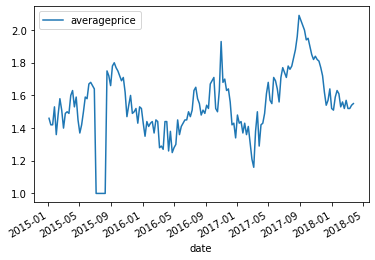

In [ ]:
date_price.plot(x='date', y='averageprice', kind="line")

In [ ]:
#To use fbprophet, we need to rename the column names as:
date_price = date_price.rename(columns={'date':'ds', 'averageprice':'y'})

In [ ]:
#Create the model
model = Prophet()

In [ ]:
#Fit the model
model.fit(date_price)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
#Predictions:
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

In [ ]:
#Use plotly for interactive forecast.
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, forecast)

In [ ]:
#Similarly, an interactive plot for the components:
plot_components_plotly(model, forecast)
#Figure 1 shows the trend of the price year on year. The second year shows the seasonality of the prices.

There us a steep upward trend for Organic Hass Prices

#### (13.6) Predictions for Sale of Small/Medium Hass Avacados.

In [ ]:
#Checking entries per region.
regions = df.groupby(df.region)
print("Total regions :", len(regions))
print("-------------")
for name, group in regions:
    print(name, " : ", len(group))

Total regions : 54
-------------
Albany  :  338
Atlanta  :  338
BaltimoreWashington  :  338
Boise  :  338
Boston  :  338
BuffaloRochester  :  338
California  :  338
Charlotte  :  338
Chicago  :  338
CincinnatiDayton  :  338
Columbus  :  338
DallasFtWorth  :  338
Denver  :  338
Detroit  :  338
GrandRapids  :  338
GreatLakes  :  338
HarrisburgScranton  :  338
HartfordSpringfield  :  338
Houston  :  338
Indianapolis  :  338
Jacksonville  :  338
LasVegas  :  338
LosAngeles  :  338
Louisville  :  338
MiamiFtLauderdale  :  338
Midsouth  :  338
Nashville  :  338
NewOrleansMobile  :  338
NewYork  :  338
Northeast  :  338
NorthernNewEngland  :  338
Orlando  :  338
Philadelphia  :  338
PhoenixTucson  :  338
Pittsburgh  :  338
Plains  :  338
Portland  :  338
RaleighGreensboro  :  338
RichmondNorfolk  :  338
Roanoke  :  338
Sacramento  :  338
SanDiego  :  338
SanFrancisco  :  338
Seattle  :  338
SouthCarolina  :  338
SouthCentral  :  338
Southeast  :  338
Spokane  :  338
StLouis  :  338
Syracuse  

In [ ]:
date_sales = regions.get_group(pred_for)[['date', '4046']].reset_index(drop=True)

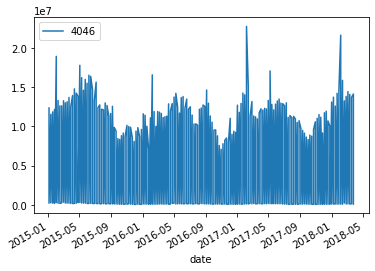

In [ ]:
date_sales.plot(x='date', y='4046', kind="line")

In [ ]:
#To use fbprophet, we need to rename the column names as:
date_sales = date_sales.rename(columns={'date':'ds', '4046':'y'})

In [ ]:
#Create the model
model = Prophet()

In [ ]:
#Fit the model
model.fit(date_sales)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
#Predictions:
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

In [ ]:
#Use plotly for interactive forecast.
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, forecast)

In [ ]:
#Similarly, an interactive plot for the components:
plot_components_plotly(model, forecast)
#Figure 1 shows the trend of the sale year on year. The second year shows the seasonality of the sales.

The above trend shows a very slight drop in the sales, and only looks exagerated in the graph above. Looking numerically, the sales seem to be going pretty strong.

#### (13.7) Predictions for Sale of Large Hass Avacados

In [ ]:
#Entries per region are same as there are no null values in our dataset.
date_sales = regions.get_group(pred_for)[['date', '4225']].reset_index(drop=True)

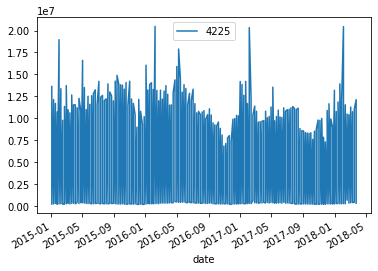

In [ ]:
date_sales.plot(x='date', y='4225', kind="line")

In [ ]:
#To use fbprophet, we need to rename the column names as:
date_sales = date_sales.rename(columns={'date':'ds', '4225':'y'})

In [ ]:
#Create the model
model = Prophet()

In [ ]:
#Fit the model
model.fit(date_sales)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
#Predictions:
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

In [ ]:
#Use plotly for interactive forecast.
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, forecast)

In [ ]:
#Similarly, an interactive plot for the components:
plot_components_plotly(model, forecast)
#Figure 1 shows the trend of the sale year on year. The second year shows the seasonality of the sales.

The sales for Large Hass on the other hand, show a huge drop in sales.(Unlike small/medium which seem to be maintaining the sales pretty well)

#### (13.8) Predictions for Sale of Extra Large Hass Avacados.

In [ ]:
#Entries per region are same as there are no null values in our dataset.
date_sales = regions.get_group(pred_for)[['date', '4770']].reset_index(drop=True)

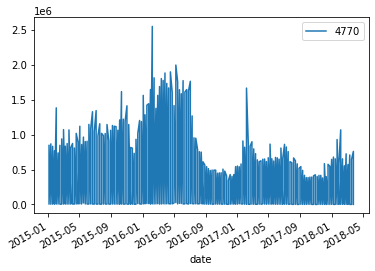

In [ ]:
date_sales.plot(x='date', y='4770', kind="line")

In [ ]:
#To use fbprophet, we need to rename the column names as:
date_sales = date_sales.rename(columns={'date':'ds', '4770':'y'})

In [ ]:
#Create the model
model = Prophet()

In [ ]:
#Fit the model
model.fit(date_sales)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
#Predictions:
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

In [ ]:
#Use plotly for interactive forecast.
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, forecast)

In [ ]:
#Similarly, an interactive plot for the components:
plot_components_plotly(model, forecast)
#Figure 1 shows the trend of the sale year on year. The second year shows the seasonality of the sales.

The sales for extra large hass was very low initially and yet it seems to be dropping fast

#### (13.9) Prediction for the sales of Avacados as a whole (Not Hass)

In [ ]:
#Entries per region are same as there are no null values in our dataset.
date_sales = regions.get_group(pred_for)[['date', 'total volume']].reset_index(drop=True)

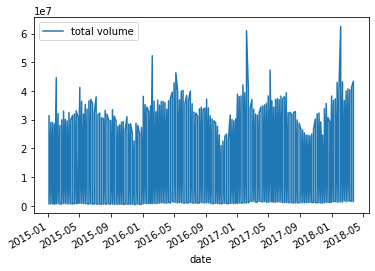

In [ ]:
date_sales.plot(x='date', y='total volume', kind="line")

In [ ]:
#To use fbprophet, we need to rename the column names as:
date_sales = date_sales.rename(columns={'date':'ds', 'total volume':'y'})

In [ ]:
#Create the model
model = Prophet()

In [ ]:
#Fit the model
model.fit(date_sales)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
#Predictions:
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

In [ ]:
#Use plotly for interactive forecast.
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, forecast)

In [ ]:
#Similarly, an interactive plot for the components:
plot_components_plotly(model, forecast)
#Figure 1 shows the trend of the sale year on year. The second year shows the seasonality of the sales.

From the above graph, we can see the avacado sales are going up, eventhough Hass sales are on a downward trend.